In [1]:
# ပထမဆုံး geopandas ကို install လုပ်ရပါမယ်။ 
# သူ့ကလဲ pandas လိုပါပဲ။ datatypes ၂ မျိုးရှိပါတယ်။ 
# Geo dataFrame နဲ့ Geo dataseries ဆိုပြီးဖြစ်ပါတယ်။

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# install လုပ်ပြီးတာနဲ့ အသုံးပြုဖို့အတွက် import လုပ်ရပါမယ်။

import geopandas as gpd #geopandas ကို import လုပ်ခြင်း

# ကျန်တဲ့ တွဲသုံးမယ့် libraries တွေကိုလဲ import လုပ်ဖို့လိုပါတယ်။

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import linestring, Polygon, Point

In [4]:
# geopandas ရဲ့ original data တွေကို ပထမဆုံးအနေနဲ့ ဆွဲထုတ်ပြီး သုံးပါမယ်။

gpd.datasets.get_path('naturalearth_lowres')

# geopandas မှာ original dataset က naturalearth_lowres နဲ့ naturalearth_cities ဖြစ်ပါတယ်။


'/usr/local/lib/python3.7/dist-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [5]:
# Variable နာမည်တခုပေးပြီး အပေါ်က dataset ကို အသုံးပြုပါမယ်။

world=gpd.datasets.get_path('naturalearth_lowres')
world

# output ထွက်လာတာကို ကြည့်လိုက်ရင် shp file ဆိုတာကိုတွေ့ရပါမယ်။

'/usr/local/lib/python3.7/dist-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [6]:
# အဲ့ shape file ကို သုံးဖို့အတွက် read_file method ကို သုံးဖို့လိုပါတယ်။

world_df=gpd.read_file(world)
world_df

# ထွက်လာတဲ့ output က pandas dataframe က ထွက်လာသလိုပဲထွက်လာတာပါ။
# pandas လိုပဲ သုံးရတာ အတူတူပါပဲ။ ဒါပေမယ့် geopandas ကတော့ geometry တွေပါတာပဲ ကွာတာပါ။

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [7]:
# တခါထဲနဲ့ dataset ထဲက shape_file ကို သုံးချင်ရင်
cities=gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


In [8]:
# ကိုယ့် shp file ရဲ့ information ကို စစ်ကြည့်ရအောင်
world_df.info()

# ဒီမှာဆိုရင် output ထွက်လာတဲ့ dtype တွေမှာ int64, object, float64 နဲ့ geometry ထွက်လာတာကိုတွေ့ရမှာ ဖြစ်ပါတယ်။

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [9]:
# dataframe တခုလုံးနဲ့ column တခုချင်းစီလိုက် datatype ကို စစ်ကြည့်ရအောင်။
print(type(world_df)) #dataframe တခုလုံးကို စစ်တာဖြစ်ပါတယ်။
print(type(world_df.name)) #column ကို စစ်တာဖြစ်ပါတယ်။

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.series.Series'>


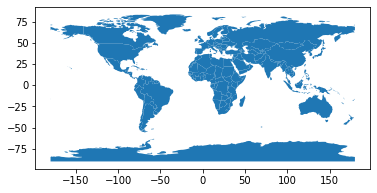

In [10]:
# shp file အား visualization ပြုလုပ်ခြင်း
world_df.plot()

In [11]:
# loc နဲ့ iloc method ဖြင့် row အလိုက်မြေပုံအား ကြည့်ခြင်း
# loc က index name ဖြင့် row အားကြည့်ရှုခြင်းဖြစ်ပြီး
# iloc ကတော့ index loctaion ဖြင့် row အားကြည့်တာဖြစ်ပါတယ်။
# ကိုယ်ရချင်တဲ့ row name (သို့) row index ကိုထည့်တာနဲ့ row မှာရှိတဲ့ data အားလုံးကို output လုပ်ပေးမှာဖြစ်ပါတယ်။
print(world_df.loc[100])

pop_est                                                  758288
continent                                                  Asia
name                                                     Bhutan
iso_a3                                                      BTN
gdp_md_est                                               6432.0
geometry      POLYGON ((91.69665652869668 27.771741848251665...
Name: 100, dtype: object


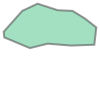

In [12]:
# မြေပုံအနေနဲ့ ကြည့်ခြင်ရင်တော့ geometry column ကို အသုံးပြုရမှာဖြစ်ပါတယ်။
world_df.loc[100].geometry
#ဒီမှာက index 100 မှာရှိတဲ့ geometry ကို ကြည့်တာဖြစ်ပါတယ်။

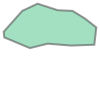

In [13]:
world_df['geometry'].loc[100]
# ဒါကျတော့ geometry column ရဲ့ 100 မြှောက် row ကို ကြည့်တာဖြစ်ပါတယ်။

In [14]:
# ဒီနေ့တော့ ဒီလောက်ပဲ။ (23-6-2022)